In [49]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy.io.wavfile
import scipy.fft
Fs, y = scipy.io.wavfile.read('train_bird.wav')
print(Fs, y, len(y))
Audio(y, rate=Fs)

8192 [-1056   -38  -373 ...  -138   448   510] 12880


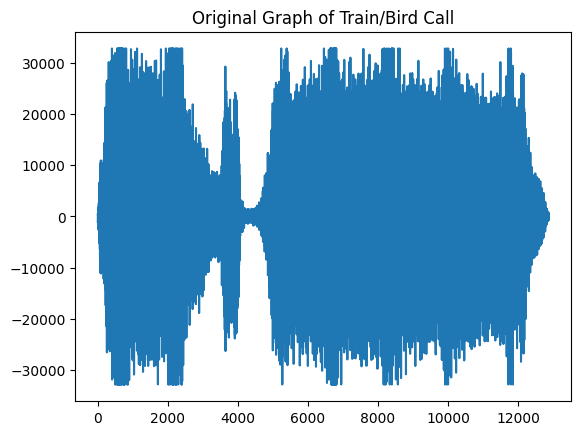

In [50]:
# Printing original signal
plt.title('Original Graph of Train/Bird Call')
plt.plot(y)

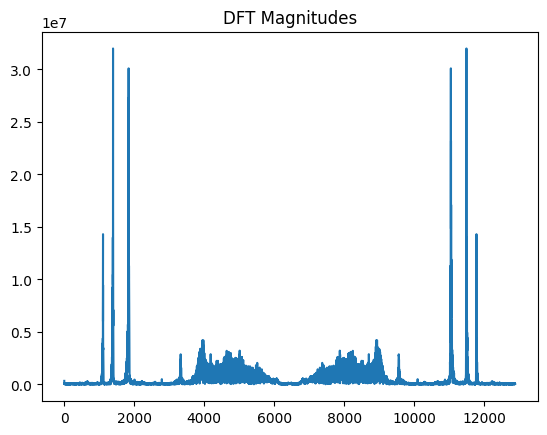

In [51]:
fft_y = scipy.fft.fft(y)
magnitudes = np.abs(fft_y)
plt.title('DFT Magnitudes')
plt.plot(magnitudes)

In [52]:
# Low pass filter
def low_pass_filter(x, p):

    X = scipy.fft.fft(x)
    X[p:len(X)-p] = 0
    filter_X = scipy.fft.ifft(X).real
    return filter_X

# High pass filter
def high_pass_filter(x, p):

    X = scipy.fft.fft(x)
    X[:p] = 0
    X[len(X)-p:] = 0
    filter_X = scipy.fft.ifft(X).real
    return filter_X

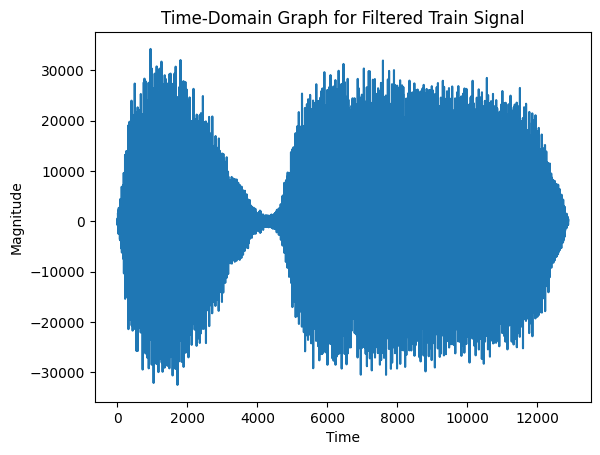

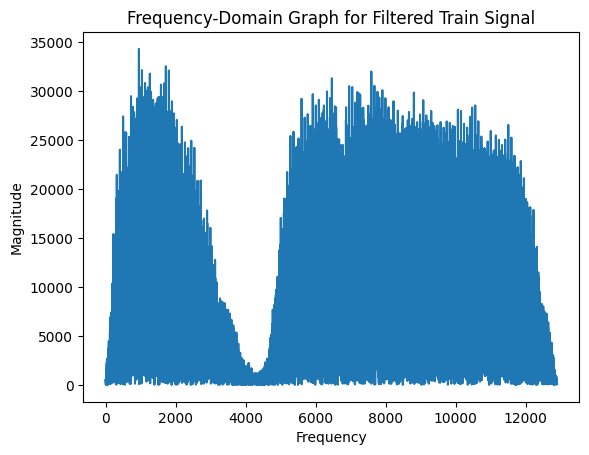

In [53]:
train = low_pass_filter(y,3500)
plt.plot(train)
plt.title('Time-Domain Graph for Filtered Train Signal')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()
plt.plot(abs(train))
plt.title('Frequency-Domain Graph for Filtered Train Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
Audio(train, rate=Fs)

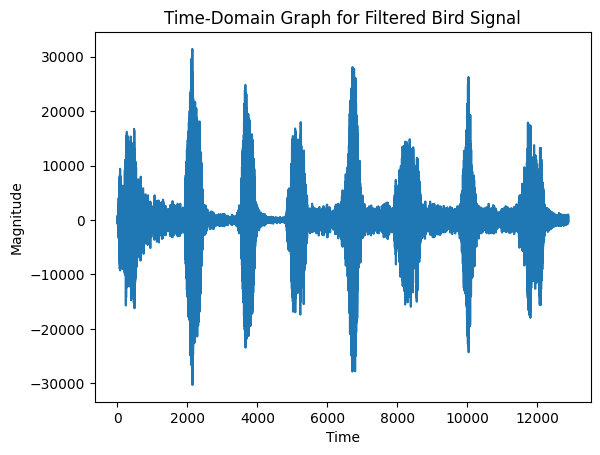

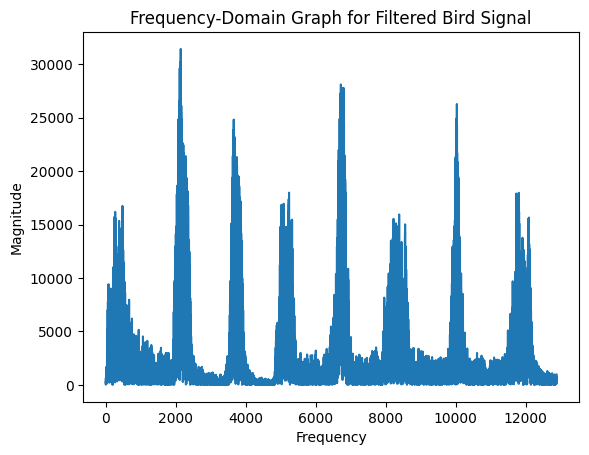

In [54]:
bird = high_pass_filter(y,4000)
plt.plot(bird)
plt.title('Time-Domain Graph for Filtered Bird Signal')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()
plt.plot(abs(bird))
plt.title('Frequency-Domain Graph for Filtered Bird Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
Audio(bird, rate=Fs)